# **Loading Packages and Data**

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
print("Setup Complete")

Setup Complete


In [2]:
df_path = "/kaggle/input/prosper-loan/prosperLoanData.csv"

df = pd.read_csv(df_path)

# **Data Structure and Content**

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# **Data Assessment**

> We will now assess our dataframe, with particular focus on the features of interest. The major goal here is data exploration

In [6]:
# Create a list of key feature names
key_features = ['ListingCreationDate', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner',
                'IncomeRange', 'IncomeVerifiable', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR']

In [7]:
df[key_features].sample(20)

,ListingCreationDate,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR
11690,2014-01-13 18:35:59.690000000,1,OH,True,"$50,000-74,999",True,0.32,5166.666667,60,C,Employed,Current,20000,0.20808
5146,2012-04-12 18:14:13.200000000,3,MO,True,$0,True,NaN,0.000000,36,D,Employed,Completed,11500,0.26681
53944,2014-03-05 20:25:35.973000000,1,CA,True,"$75,000-99,999",False,NaN,7833.333333,36,B,Self-employed,Current,8500,0.16678
45459,2010-01-18 13:43:18.073000000,1,CT,True,"$50,000-74,999",True,0.37,5166.666667,36,C,Full-time,Completed,2000,0.37453
13352,2012-08-21 10:36:10.950000000,1,AK,False,"$25,000-49,999",False,NaN,2333.333333,36,E,Employed,Completed,4000,0.33051
9864,2013-09-30 05:35:08.277000000,1,NM,True,"$50,000-74,999",False,NaN,4333.333333,60,B,Self-employed,Current,13500,0.17532
91245,2012-09-29 10:16:33.347000000,15,MO,True,"$100,000+",True,0.18,9166.666667,36,C,Employed,Current,3000,0.21434
3037,2012-03-03 12:36:32.433000000,1,TX,False,"$50,000-74,999",False,NaN,4416.666667,36,D,Employed,Completed,3000,0.26681
37539,2006-12-07 11:35:28.770000000,0,MD,False,Not displayed,True,0.07,3900.000000,36,NaN,Not available,Defaulted,6001,0.23748
47915,2011-08-20 16:54:11.463000000,7,NY,False,"$50,000-74,999",False,NaN,5000.000000,36,D,Employed,Current,4000,0.30532


In [8]:
# Examine for duplicates
duplicates = df[key_features].duplicated().sum()

print(duplicates)

871


In [9]:
df[key_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   IsBorrowerHomeowner        113937 non-null  bool   
 4   IncomeRange                113937 non-null  object 
 5   IncomeVerifiable           113937 non-null  bool   
 6   DebtToIncomeRatio          105383 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   Term                       113937 non-null  int64  
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  EmploymentStatus           111682 non-null  object 
 11  LoanStatus                 113937 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
 13  BorrowerAPR                11

In [10]:
df[key_features].isnull().sum()

ListingCreationDate              0
ListingCategory (numeric)        0
BorrowerState                 5515
IsBorrowerHomeowner              0
IncomeRange                      0
IncomeVerifiable                 0
DebtToIncomeRatio             8554
StatedMonthlyIncome              0
Term                             0
ProsperRating (Alpha)        29084
EmploymentStatus              2255
LoanStatus                       0
LoanOriginalAmount               0
BorrowerAPR                     25
dtype: int64

# **Assessment Summary**
> 1. Key features need to be isolated from the dataset.
> 1. There are 871 duplicate records in the dataset.
> 1. **ListingCategory (numeric)** and **ProsperRating (Alpha)** can be reassigned with column names that are easier to work with.
> 1. **ListingCreationDate** is stored with the wrong datatype. It should be a pandas datetime object.
> 1. The numeric information in **ListingCategory (numeric)** could be better expanded to reflect the actual reasons for the loan. The data dictionary contains helpful information for this.
> 1. 'Not employed' entries in **IncomeRange** could be safely replaced with 0.
> 1. The dependent variables (**BorrowerAPR** and **ProsperRating (Alpha)**) contain null values. The **DebtToIncomeRatio** column also contains null values.
> 1. **ProsperRating** and **IncomeRange** are ordinal categorical variables and should be stored in ordered form.

# **Data Cleaning**

**0. We will start by creating a copy of the original dataframe, then address each identified issue**

In [11]:
clean_df = df.copy()

**1. Isolate key features from the dataframe**

In [12]:
# Filter out the key features from the original dataframe
clean_df = clean_df[key_features]

**2. Drop the duplicate records from the dataframe**

In [13]:
clean_df = clean_df.drop_duplicates()

In [14]:
#Check for duplicates
duplicate = clean_df.duplicated()
print(duplicate.sum())

0


**3. Reassign ListingCategory (numeric) and ProsperRating (Alpha) with proper column names**

In [15]:
# Rename the columns
clean_df = clean_df.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

**4. Convert ListingCreationDate to DateTime object**

In [16]:
clean_df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

# Verify results
clean_df.dtypes[0:2]

ListingCreationDate    datetime64[ns]
ListingCategory                 int64
dtype: object

**5. Map the ListingCategory column to the right category titles**

In [17]:
# Store all the numeric categories and their titles in a dictionary
category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory column
clean_df.ListingCategory = clean_df.ListingCategory.map(category_titles)

# Preview results
clean_df.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

**6. Replace 'Not employed' entries in IncomeRange with $0**

In [18]:
clean_df.IncomeRange = clean_df.IncomeRange.str.replace('Not employed', '$0')

**7. Address the null values in BorrowerAPR, ProsperRating, and DebtToIncomeRatio columns**

In [19]:
clean_df.isnull().sum()

ListingCreationDate        0
ListingCategory            0
BorrowerState           5515
IsBorrowerHomeowner        0
IncomeRange                0
IncomeVerifiable           0
DebtToIncomeRatio       8472
StatedMonthlyIncome        0
Term                       0
ProsperRating          29084
EmploymentStatus        2255
LoanStatus                 0
LoanOriginalAmount         0
BorrowerAPR               25
dtype: int64

In [20]:
#How many missing data points do we have in %?
missing_values_count = clean_df.isnull().sum()

total_missing = missing_values_count.sum() 
total_cells = np.product(clean_df.shape)

percent_missing = (total_missing/total_cells) * 100
print(percent_missing,"%")

2.8650143658192055 %


> **BorrowerAPR** and **ProsperRating** are integral to our analysis. They are our dependent variables. Hence, it is important to maintain the integrity of their data. We will drop the null values if their combined sum is ***less than 30%*** of the records in our entire dataframe. This ensures that we have enough data to analyze even after the null values have been removed.

> Values in the **DebtToIncomeRatio** column can be null if:
> 
> * The borrower has never taken a debt on the platform before.
> * The borrower is currently not servicing any debt.

> As a result, we will only be dealing with null values in the BorrowerAPR and ProsperRating columns.

In [21]:
# Create a list of columns with null values
null_columns = ['BorrowerAPR', 'ProsperRating']

# Estimate the number of null records in each column with a list comprehension
null_counts = [clean_df[col].isnull().sum() for col in null_columns]

# Calculate the total proportion of null values in the dataframe
null_proportion = sum(null_counts) / clean_df.shape[0]

print('The combined percentage of null records is ' + str(null_proportion * 100)[:5] + '%')

The combined percentage of null records is 25.74%


> Since the combined percentage is less than 30%, we will proceed to drop the null records from our dataframe

In [22]:
# Filter out null values from the dataframe
for col in null_columns:
    clean_df = clean_df[clean_df[col].notnull()]

In [23]:
clean_df.isnull().sum()

ListingCreationDate       0
ListingCategory           0
BorrowerState             0
IsBorrowerHomeowner       0
IncomeRange               0
IncomeVerifiable          0
DebtToIncomeRatio      7214
StatedMonthlyIncome       0
Term                      0
ProsperRating             0
EmploymentStatus          0
LoanStatus                0
LoanOriginalAmount        0
BorrowerAPR               0
dtype: int64

**8. Convert ProsperRating and IncomeRange columns to ordered categorical types**

In [24]:
clean_df.head()

,ListingCreationDate,ListingCategory,BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating,EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR
1,2014-02-27 08:28:07.900,Home Improvement,CO,False,"$50,000-74,999",True,0.18,6125.000000,36,A,Employed,Current,10000,0.12016
3,2012-10-22 11:02:35.010,Motorcycle,GA,True,"$25,000-49,999",True,0.15,2875.000000,36,A,Employed,Current,10000,0.12528
4,2013-09-14 18:38:39.097,Home Improvement,MN,True,"$100,000+",True,0.26,9583.333333,36,D,Employed,Current,15000,0.24614
5,2013-12-14 08:26:37.093,Debt Consolidation,NM,True,"$100,000+",True,0.36,8333.333333,60,B,Employed,Current,15000,0.15425
6,2013-04-12 09:52:56.147,Debt Consolidation,KS,False,"$25,000-49,999",True,0.27,2083.333333,36,E,Employed,Current,3000,0.31032


In [25]:
# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    clean_df[key] = clean_df[key].astype(correct_order)

# Verify changes
clean_df[order_dict.keys()].dtypes

ProsperRating    category
IncomeRange      category
dtype: object

# **Exploratory Data Analysis (EDA)**

In [26]:
# Compute descriptive statistics for all numeric columns
clean_df.describe()

,DebtToIncomeRatio,StatedMonthlyIncome,Term,LoanOriginalAmount,BorrowerAPR
count,76768.000000,8.398200e+04,83982.000000,83982.000000,83982.000000
mean,0.258692,5.930614e+03,42.462813,9061.224381,0.226945
std,0.319727,8.268432e+03,11.639032,6279.649648,0.080047
min,0.000000,0.000000e+00,12.000000,1000.000000,0.045830
25%,0.150000,3.426938e+03,36.000000,4000.000000,0.163610
50%,0.220000,5.000000e+03,36.000000,7500.000000,0.219450
75%,0.320000,7.083333e+03,60.000000,13500.000000,0.292540
max,10.010000,1.750003e+06,60.000000,35000.000000,0.423950


# **A. Univariate Exploration**

**Question One: How are Borrower APR values distributed in the dataset, do the majority of loans have high or low APR values?**

<AxesSubplot:xlabel='BorrowerAPR', ylabel='Count'>

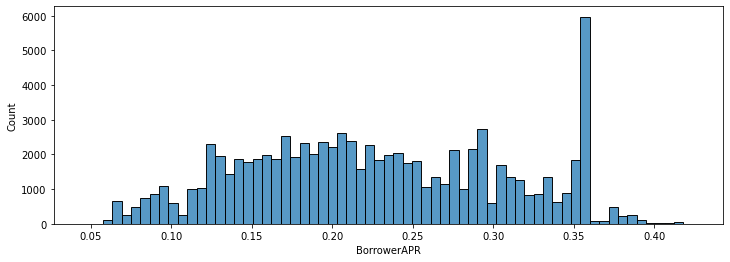

In [27]:
plt.figure(figsize=(12, 4))

sns.histplot(clean_df['BorrowerAPR'])

**Observations**
> **Borrower APR** has peaks around 0.09, 0.2 and 0.3 respectively. A very sharp peak can also be seen between 0.35 and 0.36. In general, only few listings have borrower APR greater than 0.4.

**Question Two: How are the values for Debt-to-income ratio distributed, are borrowers taking more debt than their income could possibly handle?**

Text(0.5, 0, 'DebtToIncomeRatio')

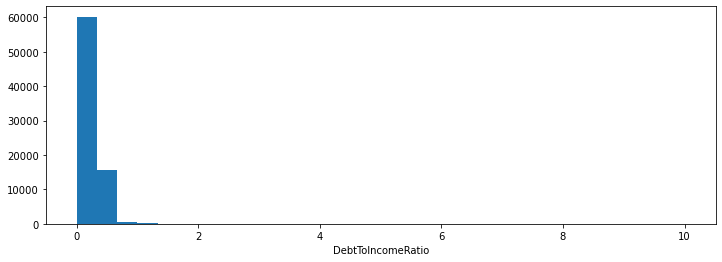

In [28]:
plt.figure(figsize=(12, 4))
plt.hist(data=clean_df, x='DebtToIncomeRatio',bins=30)
plt.xlabel('DebtToIncomeRatio')

Text(0.5, 0, 'DebtToIncomeRatio')

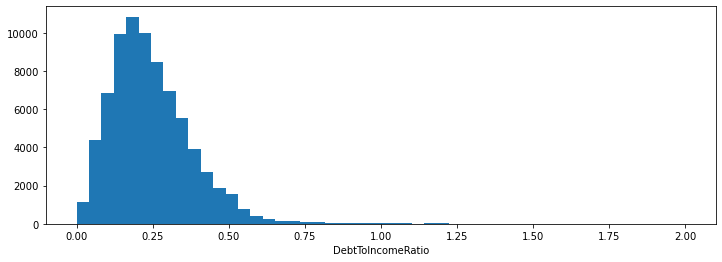

In [29]:
# Zoom into the distribution and examine closely, with evenly spaced bins
plt.figure(figsize=(12, 4))
plt.hist(data=clean_df, x='DebtToIncomeRatio', bins=np.linspace(0, 2))
plt.xlabel('DebtToIncomeRatio')

**Observations**
> The distribution of **DebtToIncomeRatio** is right skewed. Most borrowers seem to prefer taking loans within their means. This can be seen as the bulk of values are distributed between 0 and 1.

> Zooming into this distribution, we see a peak around 0.20 and 0.25. 

**Question Three: What is the distribution of loan amounts requested by borrowers?**

Text(0.5, 0, 'Loan original amount ($)')

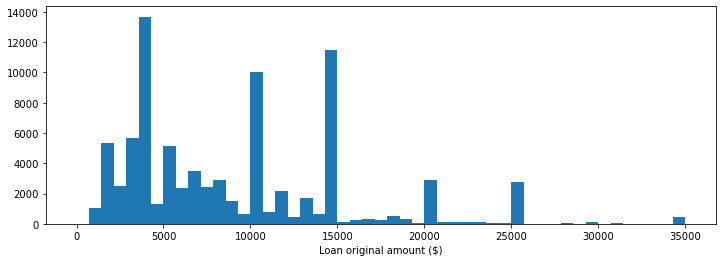

In [30]:
plt.figure(figsize=(12, 4))
plt.hist(data=clean_df, x='LoanOriginalAmount',bins=np.linspace(0, clean_df.LoanOriginalAmount.max()))
plt.xlabel('Loan original amount ($)')

> It is clear that the majority of the loans do not exceed 15,000$

**Question Four: How are the length of loans distributed in the dataset? What loan terms are most commonly requested by borrowers?**

Text(0.5, 0, 'Term (months)')

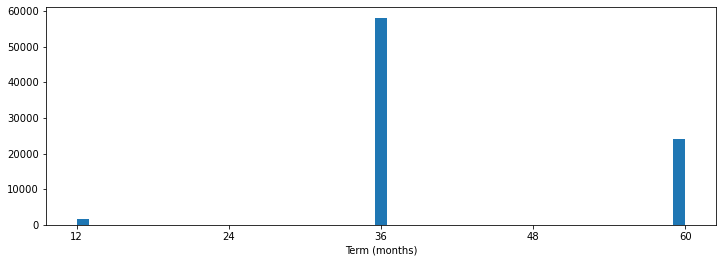

In [31]:
plt.figure(figsize=(12, 4))
plt.hist(data=clean_df, x='Term',bins=np.linspace(clean_df.Term.min(), clean_df.Term.max()))
plt.xticks(np.arange(12, 61, 12))
plt.xlabel('Term (months)')

**Observations**

> The majority of borrowers apply for three-year (36 months) loans, while others apply for five-year (60 months) loans. Short-term loans of one year (12 months) are the least requested.

**Question Five: How are Prosper ratings, Income range and Employment status distributed among listings in the dataset?**

<AxesSubplot:xlabel='ProsperRating', ylabel='count'>

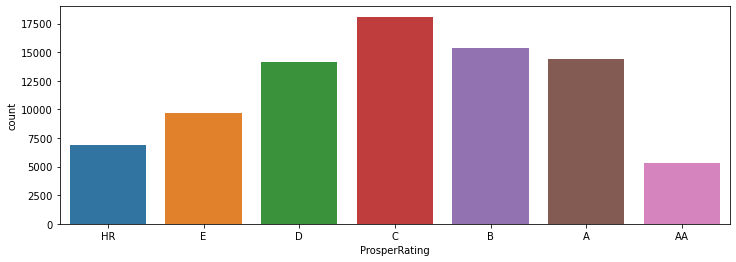

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(data=clean_df, x="ProsperRating")

**Observation**
> The distribution of prosper ratings has most common rating belonging to the central grade represented (C). Listings with very high prosper ratings (AA) are the least common.

<AxesSubplot:xlabel='IncomeRange', ylabel='count'>

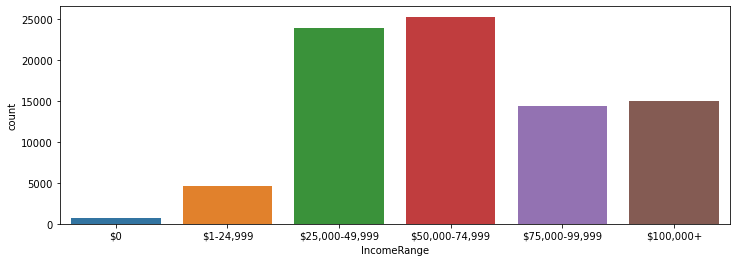

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(data=clean_df, x="IncomeRange")

**Observation**
> Income range shows a left skew. Most of the listings came from borrowers earning between 25,000 and 74,999 US dollars per annum. Only a few proportion of the listings had borrowers that earned below 25,000 US dollars per annual.

<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

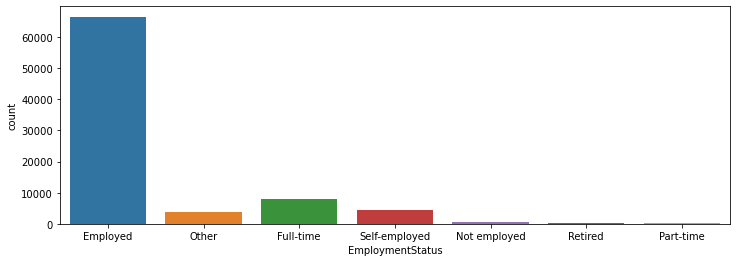

In [34]:
plt.figure(figsize=(12,4))
sns.countplot(data=clean_df, x="EmploymentStatus")

**Observation**
> The pattern in employment status shows that the majority of listings are created by employed people. This is quite intuitive, considering how difficult it would be to obtain a loan without a job.


**Question Six: How are the following variables distributed: IsBorrowerHomeowner, IncomeVerifiable and ListingCategory?**

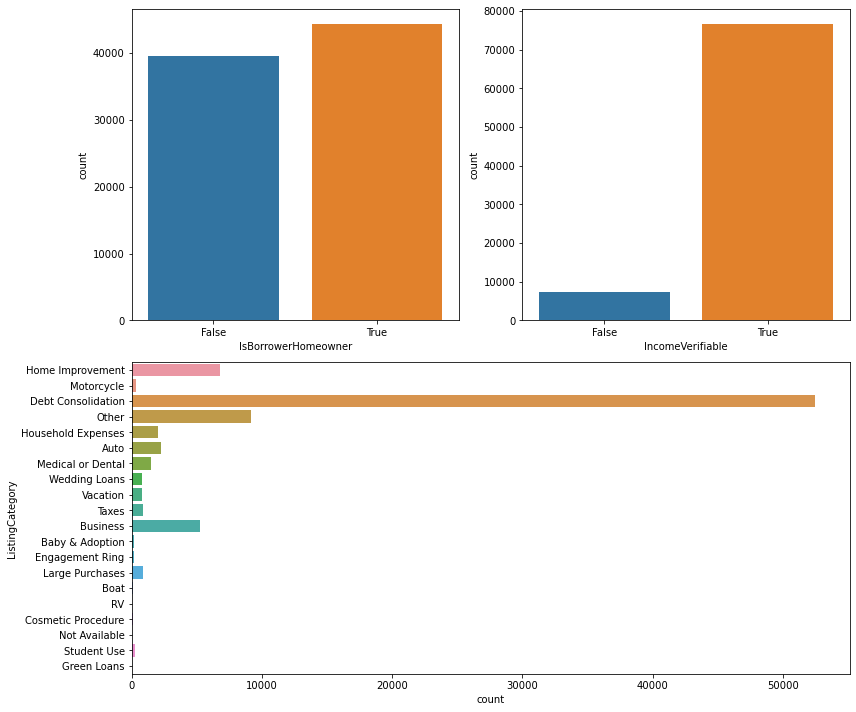

In [35]:
plt.figure(figsize=(12, 10))
# IsBorrowerHomeowner
plt.subplot(2,2,1)
sns.countplot(data=clean_df, x='IsBorrowerHomeowner')

# IncomeVerifiable
plt.subplot(2,2,2)
sns.countplot(data=clean_df, x='IncomeVerifiable')

# ListingCategory
plt.subplot(2,1,2)
sns.countplot(data=clean_df, y='ListingCategory')

plt.tight_layout();

**Observations**
> Homeowners are more commonly found requesting loans on the platform.

> The majority of borrowers on the platform have verifiable means of income. This is expected: Requesting a loan without a verifiable source of income may not yeild the most desired results.

> Shockingly, it appears that people seek loans from the platform, in order to pay existing loans. 

**Question Seven: How does loan status vary across listings in the dataset?**

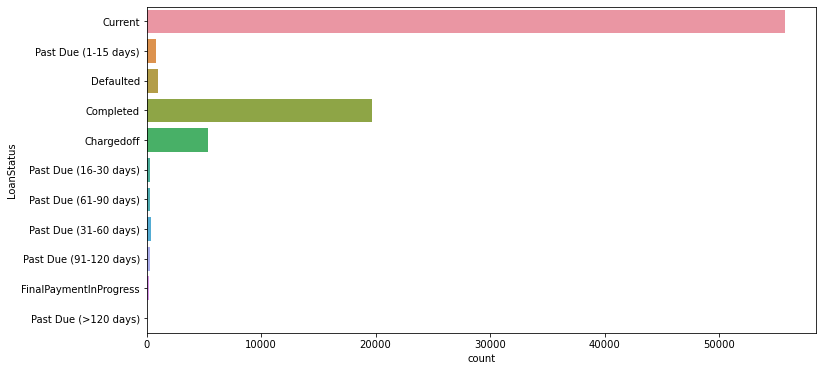

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=clean_df, y='LoanStatus');

**Observations**
> The dataset is majorly populated with current loans (over 50,000 records). Completed loans also comprise a notable proportion of the listings (about 20,000 records). Although defaulting loans are few, about 5,000 records are charged-off loans.


**Question Eight: Which states have the highest number of listings created by borrowers?**

<AxesSubplot:xlabel='BorrowerState', ylabel='count'>

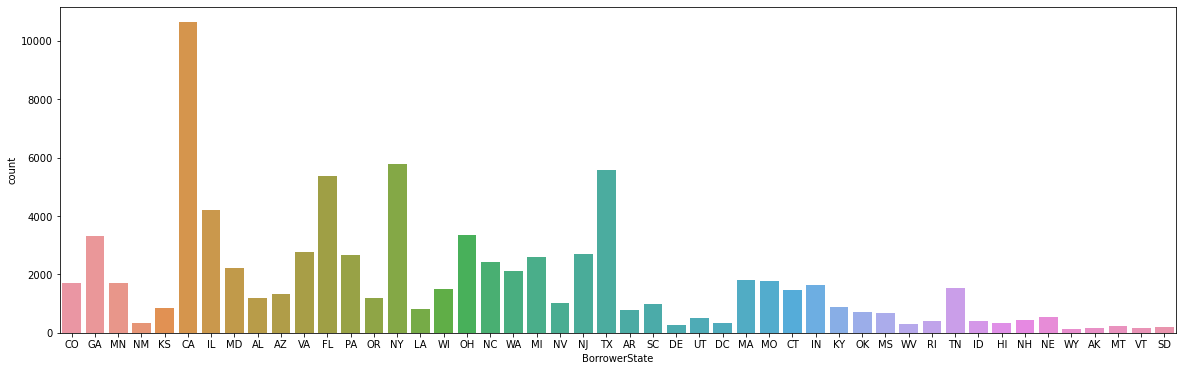

In [37]:
plt.figure(figsize=(20, 6))
sns.countplot(data=clean_df, x='BorrowerState')

**Observations**
> California(CA) has the highest number of borrowers on the listings, with over 10,000 loan listings originating from borrowers in the state. 

# **B. Bivariate Exploration**

> **We will start here by exploring pairwise correlations between our numeric variables. This will provide a clearer intuition on how to proceed further with our analysis.**

> **To visualize these relationships at an overview level, we will use the seaborn PairGrid and Heatmap.**

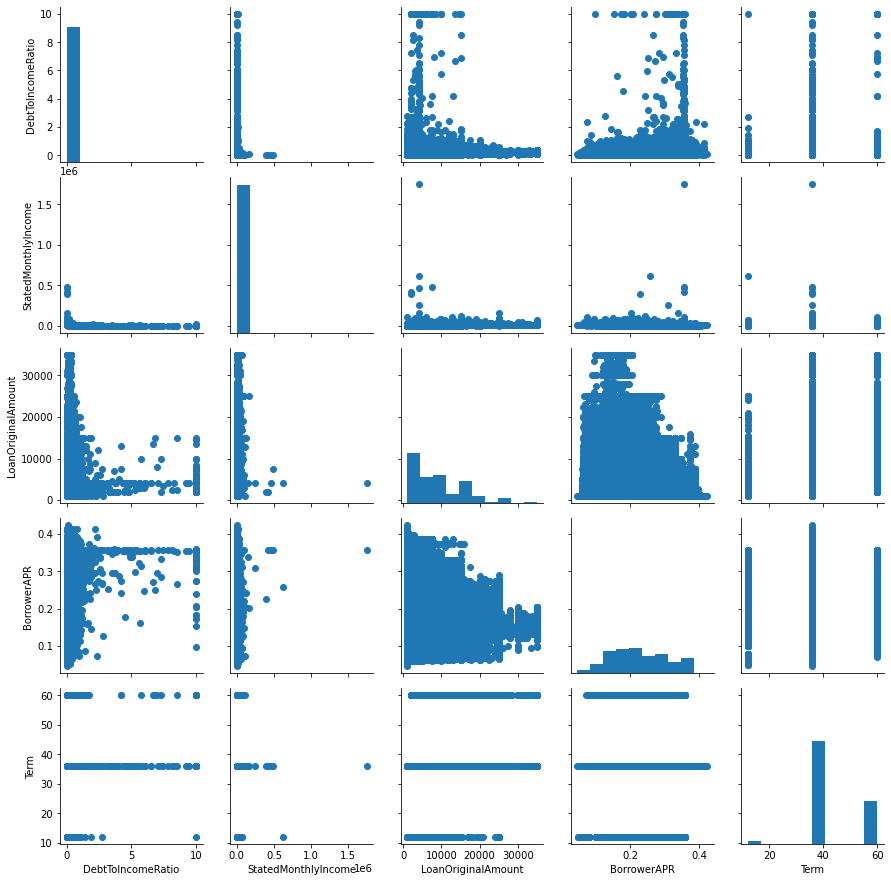

In [38]:
# Store numeric column names in a list
numeric_cols = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerAPR', 'Term']

# Create a scatterplot of each numeric variable against the other
fig = sns.PairGrid(clean_df[numeric_cols])
fig.map_diag(plt.hist)
fig.map_offdiag(plt.scatter)

<AxesSubplot:>

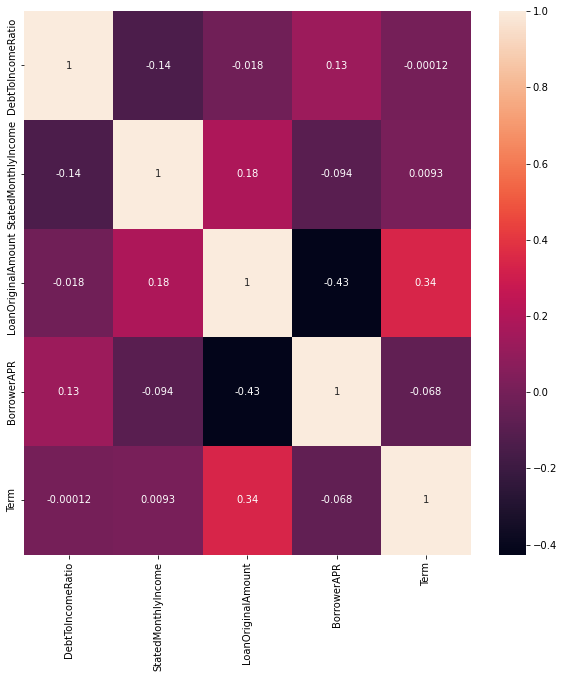

In [39]:
plt.figure(figsize = (10,10))
sns.heatmap(clean_df[numeric_cols].corr(),annot = True)

**Observations**
> There appears to be a moderate **negative** correlation (-0.43) between **loan original amount** and **Borrower APR**. This implies that larger loans may attract lesser annual percentage rates than smaller loans.

> A moderately **positive** correlation (0.34) can also be seen between the loan **term** and **LoanOriginalAmount**. This makes some sense, since borrowers may need longer terms to fully repay higher loan amounts.

> There are no notable relationships between the other numeric variables at the moment.

> **To avoid overplotting, we will take a sample of 2000 records from the loan_df dataframe, then apply some opacity settings to view the relationship better.**

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='BorrowerAPR'>

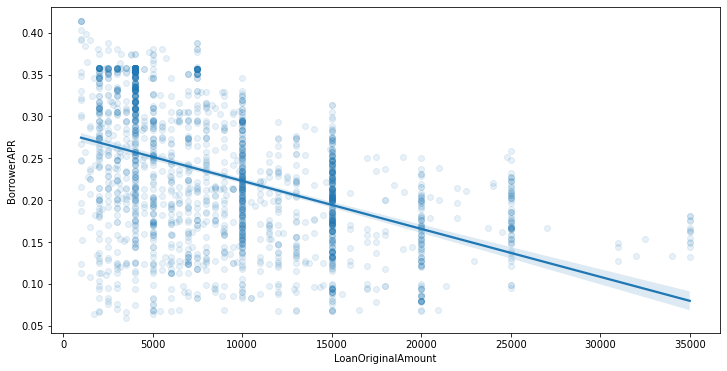

In [40]:
plt.figure(figsize=(12, 6))

sns.regplot(data=clean_df.sample(2000), x='LoanOriginalAmount', y='BorrowerAPR', scatter_kws={'alpha': 0.1})

**Observation**
> This graph observed that at the different sizes of the total loan amount, the borrower's APR has a large distribution, but the range of APR decreases with the increase of loan amount. So the borrower's APR is negatively correlated with the total loan amount.

Text(0.5, 0, 'Term (months)')

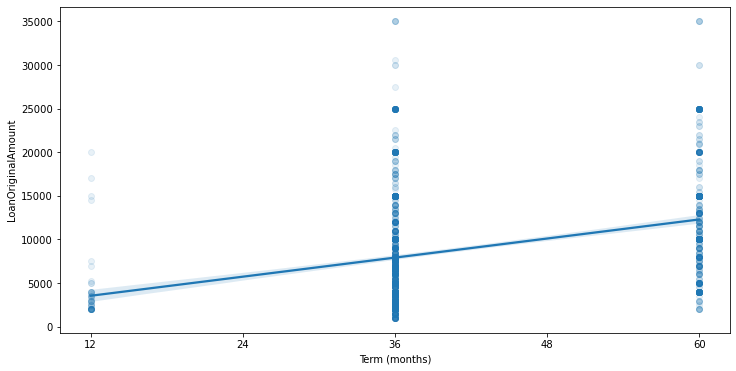

In [41]:
plt.figure(figsize=(12, 6))

sns.regplot(data=clean_df.sample(2000), x='Term', y='LoanOriginalAmount', scatter_kws={'alpha': 0.1})
plt.xticks(np.arange(12, 61, 12))
plt.xlabel('Term (months)')

**Next, we will explore the bivariate relationships between our numeric and categorical variables.**

> **Is there any relationship between numerical features such as BorrowerAPR, StatedMonthlyIncome, LoanOriginalAmount, DebtToIncomeRatio and categorical features like Term, ProsperRating, and IncomeRange?**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '$0'),
  Text(1, 0, '$1-24,999'),
  Text(2, 0, '$25,000-49,999'),
  Text(3, 0, '$50,000-74,999'),
  Text(4, 0, '$75,000-99,999'),
  Text(5, 0, '$100,000+')])

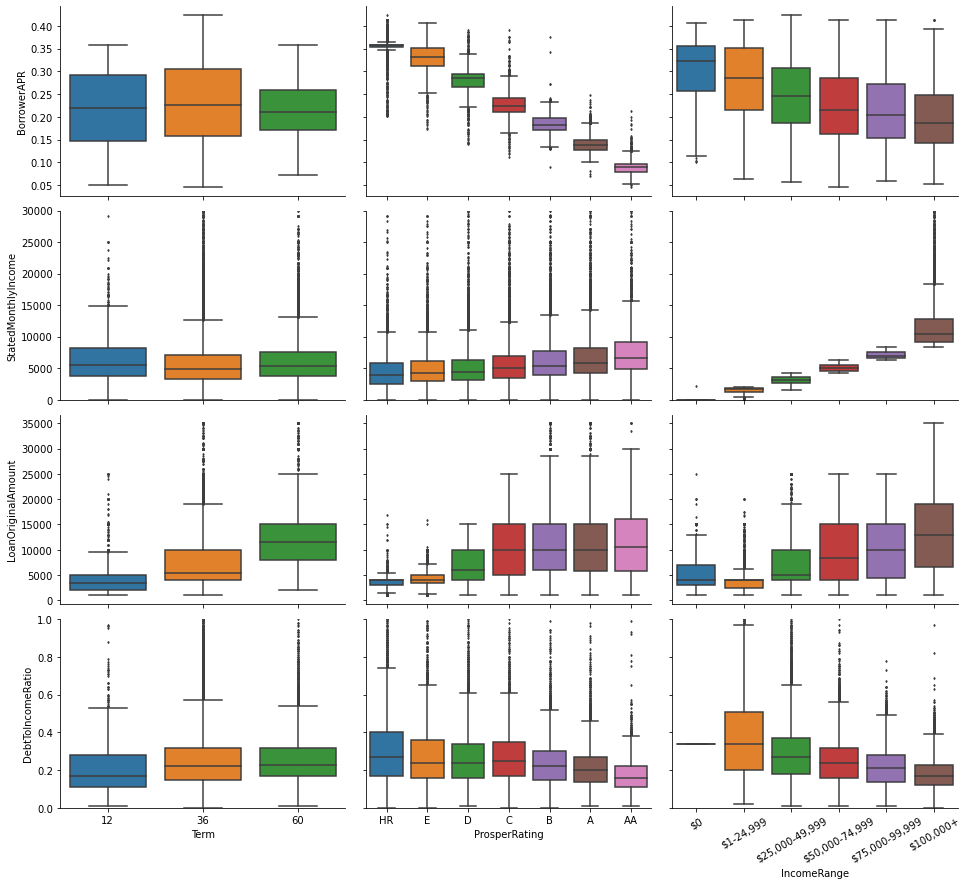

In [42]:
# Create a list of columns to plot on each pairgrid axis
x_cols = ['Term','ProsperRating', 'IncomeRange']
y_cols = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio']


# Create a custom PairGrid with column lists specified
fig = sns.PairGrid(data = clean_df, y_vars = y_cols, x_vars = x_cols, height = 3, aspect=1.5)
fig.map(sns.boxplot, fliersize=1.5)

# Limit the y axis of StatedMonthlyIncome to 0 - 30000
fig.axes[1][0].set_ylim(0, 30000)

# Limit the y axis of DebtToIncome ratio to 0 - 1
fig.axes[3][0].set_ylim(0, 1)

plt.xticks(rotation=30)

**What is the relationship between ListingCategory and LoanOriginalAmount**

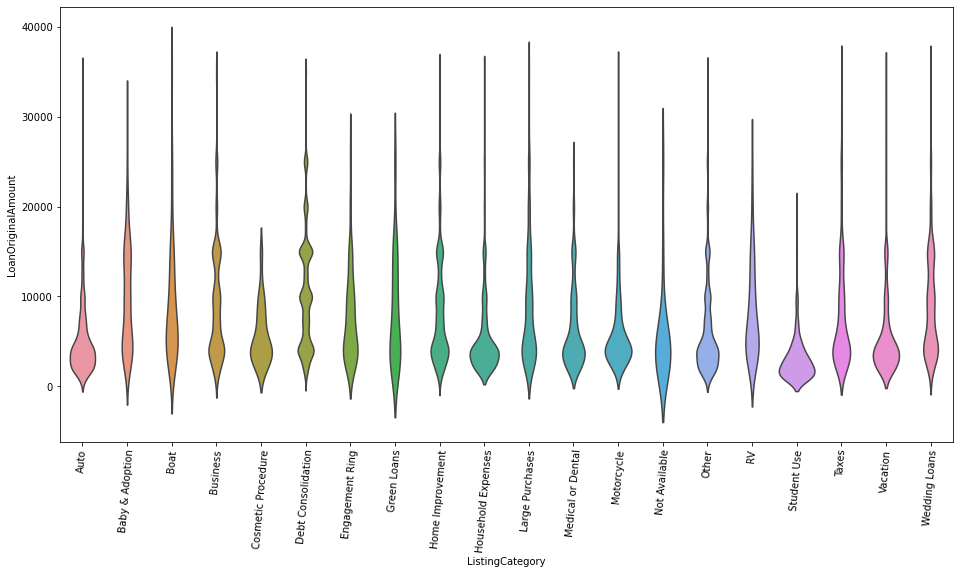

In [43]:
# Create Violinplot visual
plt.figure(figsize=(16, 8))

sns.violinplot(data=clean_df.sort_values(by='ListingCategory'), x='ListingCategory', y='LoanOriginalAmount', inner=None)
plt.xticks(rotation= 85);

**What is the relationship between BorrowerState and LoanOriginalAmount?**

<AxesSubplot:xlabel='BorrowerState', ylabel='LoanOriginalAmount'>

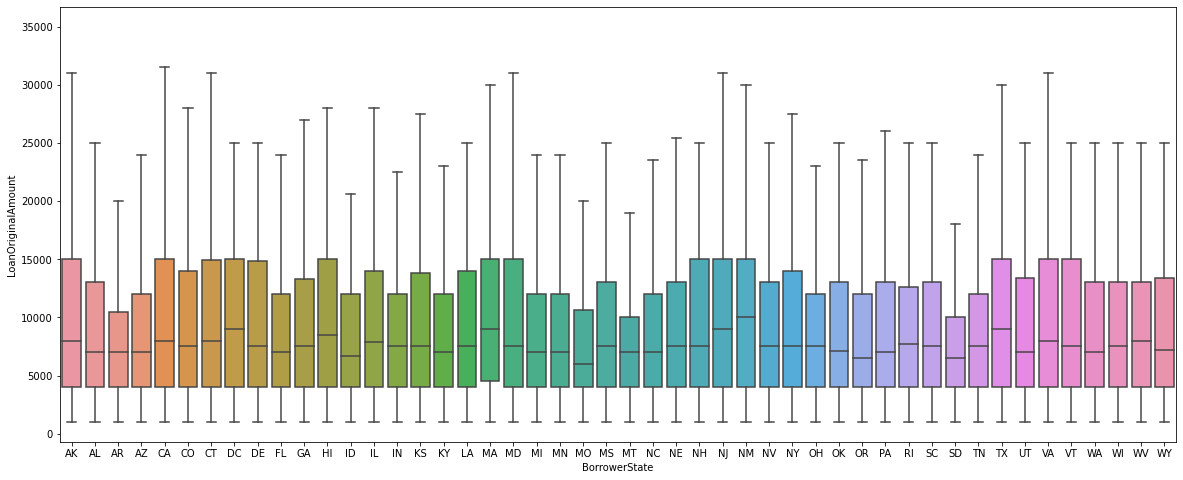

In [44]:
# Create boxplot visual
plt.figure(figsize=(20, 8))

sns.boxplot(data=clean_df.sort_values(by='BorrowerState'), x='BorrowerState', y='LoanOriginalAmount',fliersize=0)

**What is the relationship between Term and BorrowerAPR?**

<AxesSubplot:xlabel='Term', ylabel='BorrowerAPR'>

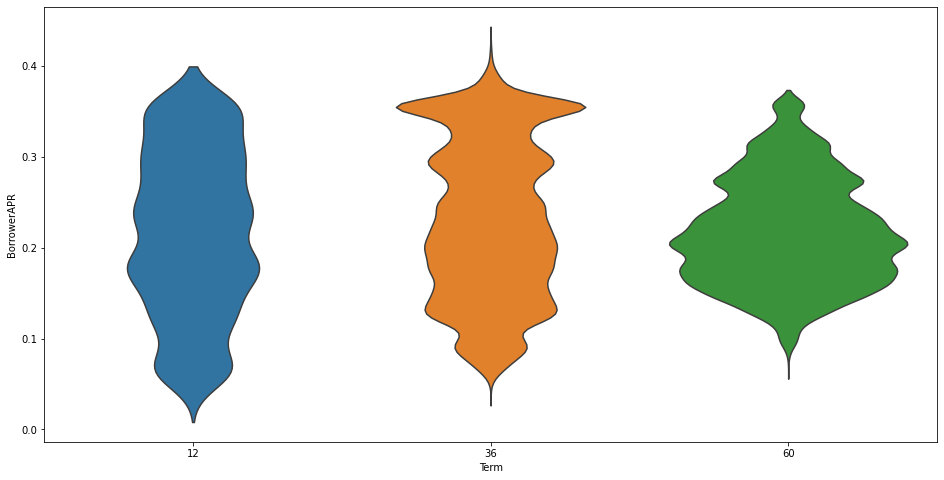

In [45]:
plt.figure(figsize=(16,8))

sns.violinplot(x='Term',y='BorrowerAPR',data=clean_df,inner=None)

# **C. Multivariate Exploration**

**What is the relationship between LoanOriginalAmount, ProsperRating and IsBorrowerHomeowner**

<AxesSubplot:xlabel='ProsperRating', ylabel='LoanOriginalAmount'>

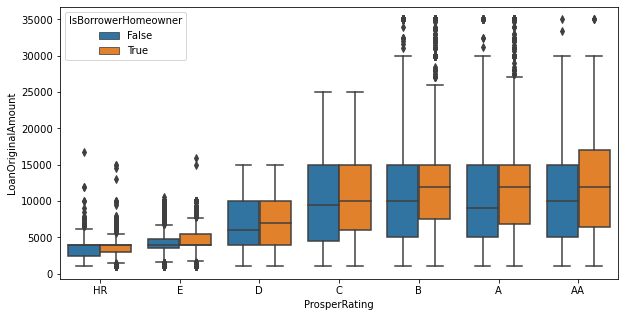

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=clean_df, x='ProsperRating', y='LoanOriginalAmount', hue='IsBorrowerHomeowner')

**Observations**
> Homeowners obtain higher loan amounts on average than others. In addition to other factors, having a home is a good consideration when higher loan amounts are involved.

**What is the relation between BorrowerAPR, LoanOriginalAmount, and IncomeRange?**

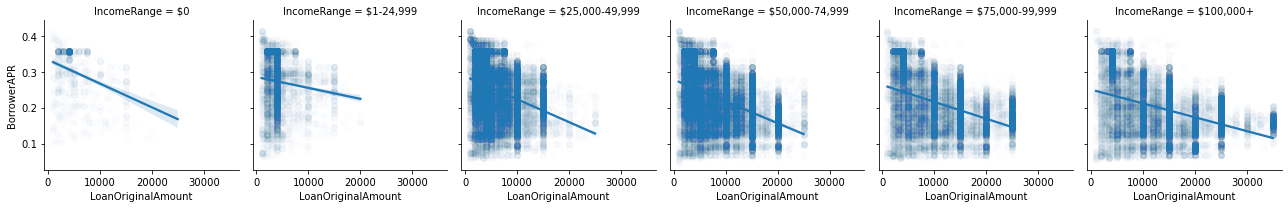

In [47]:
fig = sns.FacetGrid(data=clean_df, col='IncomeRange')
fig.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'alpha': 0.01});

**Observations**
> The high income earners enjoy larger loans at lower APRs than the low income earners. 

**What is the relationship between ProsperRating, LoanOriginalAmount, loan Term**

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


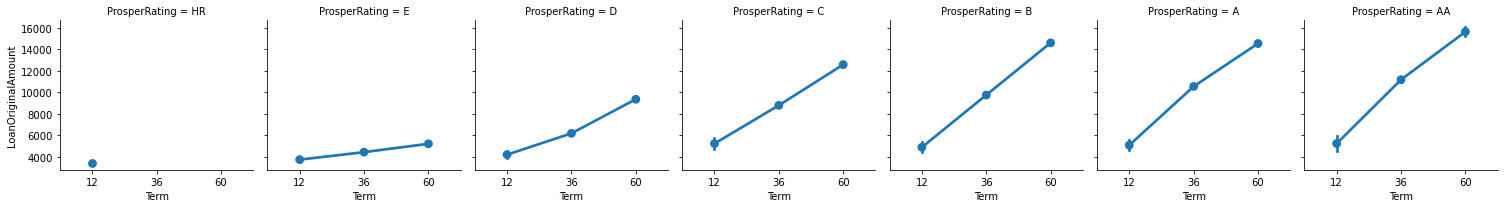

In [48]:
fig = sns.FacetGrid(data=clean_df, col='ProsperRating')
fig.map(sns.pointplot, 'Term', 'LoanOriginalAmount');

**Observations**
>  It seems that individuals with high prosper ratings tend to greatly increase their loan amounts once they have longer term periods. This can be seen from the rising slope 